# Setup

## Environment Prep

### Package Import

In [2]:
! pip install keras_metrics

import imageio
import imgaug as ia

import pandas as pd
import numpy as np
import pickle
import seaborn as sns

import os
import sys
import warnings
warnings.filterwarnings('ignore')
#!{sys.executable} -m pip install opencv-python

import time
import itertools

import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
from tensorflow import keras

import scipy
from PIL import Image
from scipy import ndimage

import tensorflow as tf
from tensorflow import keras
from keras import layers
from keras import models
from keras import optimizers
from keras import models
from keras import layers
import keras_metrics
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.models import Model
from keras.optimizers import RMSprop
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

from keras.applications.resnet import ResNet50

from sklearn.model_selection import RandomizedSearchCV, cross_val_score, GridSearchCV, validation_curve 
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.metrics import confusion_matrix, r2_score, recall_score, precision_score, f1_score, accuracy_score
from sklearn.model_selection import cross_val_score, GridSearchCV, validation_curve
from sklearn.pipeline import make_pipeline
#from tensorflow.keras import get_default_graph

from pandas_datareader import data
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
import urllib.request, json
import os
import numpy as np

from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

# This code has been tested with TensorFlow 1.6
import tensorflow as tf
#from tensorflow.examples.tutorials.mnist import input_data
np.random.seed(123)

# Transfer learning with VGG16
# from tensorflow.keras.applications.vgg16 import VGG16
# from tensorflow.keras.preprocessing import image
# from tensorflow.keras.applications.vgg16 import preprocess_input

from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input

from keras.callbacks import ModelCheckpoint, EarlyStopping



from google.colab import drive
drive.mount('/content/drive')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Using TensorFlow backend.


### Functions

In [0]:
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(40,40))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

In [0]:
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

In [0]:
def random_crop(img, random_crop_size):
    # Note: image_data_format is 'channel_last'
    assert img.shape[2] == 3
    height, width = img.shape[0], img.shape[1]
    dy, dx = random_crop_size
    x = np.random.randint(0, width - dx + 1)
    y = np.random.randint(0, height - dy + 1)
    return img[y:(y+dy), x:(x+dx), :]


def crop_generator(batches, crop_length):
    """Take as input a Keras ImageGen (Iterator) and generate random
    crops from the image batches generated by the original iterator.
    """
    while True:
        batch_x, batch_y = next(batches)
        batch_crops = np.zeros((batch_x.shape[0], crop_length, crop_length, 3))
        for i in range(batch_x.shape[0]):
            batch_crops[i] = random_crop(batch_x[i], (crop_length, crop_length))
        yield (batch_crops, batch_y)

In [0]:
def plot_conf_matrix(df_confusion, title='Confusion matrix', cmap=plt.cm.gray_r):
  plt.matshow(df_confusion, cmap=cmap) 
  # imshow
  #plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(df_confusion.columns))
  plt.xticks(tick_marks, df_confusion.columns, rotation=45)
  plt.yticks(tick_marks, df_confusion.index)
  #plt.tight_layout()
  plt.ylabel(df_confusion.index.name)
  plt.xlabel(df_confusion.columns.name)
  plot_confusion_matrix(df_confusion) 

In [0]:
def plot_conf_matrix(df_confusion, title='Confusion matrix', cmap=plt.cm.gray_r):
  plt.matshow(df_confusion, cmap=cmap) # imshow
  #plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(df_confusion.columns))
  plt.xticks(tick_marks, df_confusion.columns, rotation=45)
  plt.yticks(tick_marks, df_confusion.index)
  #plt.tight_layout()
  plt.ylabel(df_confusion.index.name)
  plt.xlabel(df_confusion.columns.name)
  plot_confusion_matrix(df_confusion)
  
 #df_confusion = pd.crosstab(y_actu, y_pred)

## Data Prep

### Data import

In [0]:
data ='/content/drive/My Drive/RxID/RxID15/modeldata'
test_folder = '/content/drive/My Drive/RxID/RxID15/modeldata/test'
train_folder = '/content/drive/My Drive/RxID/RxID15/modeldata/train'
val_folder = '/content/drive/My Drive/RxID/RxID15/modeldata/validation'
rw_folder = '/content/drive/My Drive/RxID/RxID15/Realworld images'

### Preprocessing

In [0]:
# train_generator.allowed_class_modes,
# test_generator.white_list_formats,
# train_generator.directory,
train_generator.class_indices

NameError: ignored

In [0]:
# plt.hist(list(train_generator.classes))

# Modeling

## model1 - Acc: 0.47

In [0]:
BATCH_SIZE = 32
IMG_SHAPE  = 64 
EPOCHS = 15
plottrain = True


test_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(test_folder,
                                                                        shuffle=True,
                                                                        target_size=(IMG_SHAPE,IMG_SHAPE),
                                                                        batch_size = BATCH_SIZE) 

val_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(val_folder,
                                                                       shuffle=False,
                                                                       #class_mode='binary',
                                                                       target_size=(IMG_SHAPE,IMG_SHAPE),
                                                                       batch_size = BATCH_SIZE)

train_generator = ImageDataGenerator(rescale=1./255,
                                     brightness_range=(.2,1),
                                     shear_range=0.2,
                                     channel_shift_range=128,
                                     rotation_range=45,
                                     vertical_flip=True,
                                     zoom_range=0.5,).flow_from_directory(train_folder,
                                                                          shuffle=True,
                                                                          #class_mode='binary',
                                                                          target_size=(IMG_SHAPE,IMG_SHAPE),
                                                                          batch_size=BATCH_SIZE)


Found 74 images belonging to 15 classes.
Found 150 images belonging to 15 classes.
Found 525 images belonging to 15 classes.


Model: "CNN 1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 62, 62, 768)       21504     
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 20, 20, 768)       0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 20, 20, 1024)      7078912   
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 6, 6, 1024)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 6, 6, 512)         4719104   
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 2, 2, 512)         0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 2, 2, 256)         117990

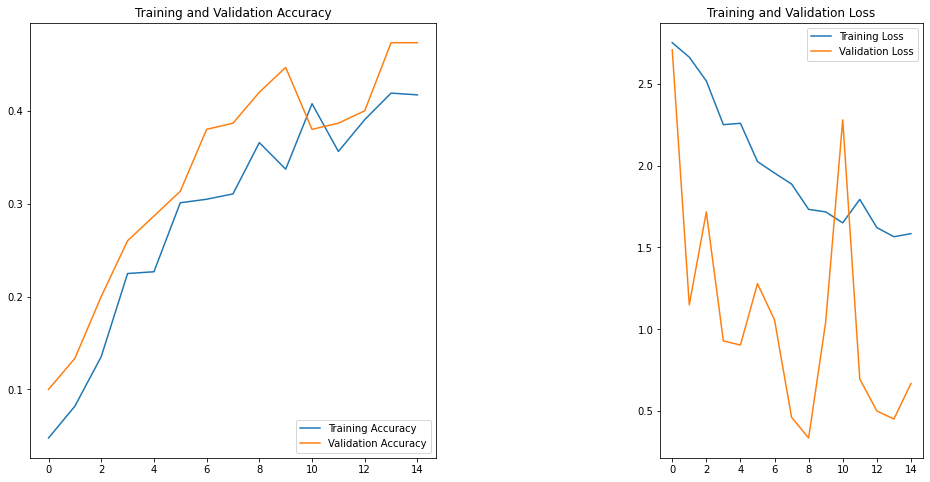

[0.6687304973602295, 0.47333332896232605]

In [0]:
model1 = models.Sequential(name='CNN 1')

model1.add(layers.Conv2D(768, (3,3), activation='relu',input_shape=(IMG_SHAPE ,IMG_SHAPE,  3)))
model1.add(layers.MaxPooling2D((3, 3)))

model1.add(layers.Conv2D(1024, (3,3), activation='relu', padding="same"))
model1.add(layers.MaxPooling2D((3, 3)))

model1.add(layers.Conv2D(512, (3,3), activation='relu', padding="same"))
model1.add(layers.MaxPooling2D((3, 3)))

model1.add(layers.Conv2D(256, (3,3), activation='relu', padding="same"))
#model1.add(layers.MaxPooling2D((3, 3))) 

model1.add(layers.Flatten())
model1.add(layers.Dense(15, activation='softmax'))

model1.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['acc'])
model1.summary()

history = model1.fit(train_generator,
                    epochs=EPOCHS,
                    #batch_size=32,
                    #validation_split= 0.1,
                    validation_data=val_generator,
                    verbose=1)

results_train1 = model1.evaluate(train_generator)
model1_val_results = model1.evaluate(val_generator)
model1_val_results
#model.predict_classes(val_images)

if plottrain == True:
  acc = history.history['acc']
  val_acc = history.history['val_acc']

  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs_range = range(EPOCHS)

  plt.figure(figsize=(16, 8))
  plt.subplot(1, 2, 1)
  plt.plot(epochs_range, acc, label='Training Accuracy')
  plt.plot(epochs_range, val_acc, label='Validation Accuracy')
  plt.legend(loc='lower right')
  plt.title('Training and Validation Accuracy')

  plt.subplot(1, 3, 3)
  plt.plot(epochs_range, loss, label='Training Loss')
  plt.plot(epochs_range, val_loss, label='Validation Loss')
  plt.legend(loc='upper right')
  plt.title('Training and Validation Loss')
  plt.savefig('./foo.png')
  plt.show()
model1_val_results

## model2 - Acc: 0.44

Found 74 images belonging to 15 classes.
Found 150 images belonging to 15 classes.
Found 525 images belonging to 15 classes.
Model: "CNN 1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_37 (Conv2D)           (None, 46, 46, 768)       21504     
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 15, 15, 768)       0         
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 15, 15, 1024)      7078912   
_________________________________________________________________
max_pooling2d_34 (MaxPooling (None, 5, 5, 1024)        0         
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 5, 5, 512)         4719104   
_________________________________________________________________
max_pooling2d_35 (MaxPooling (None, 1, 1, 512)         0         
__

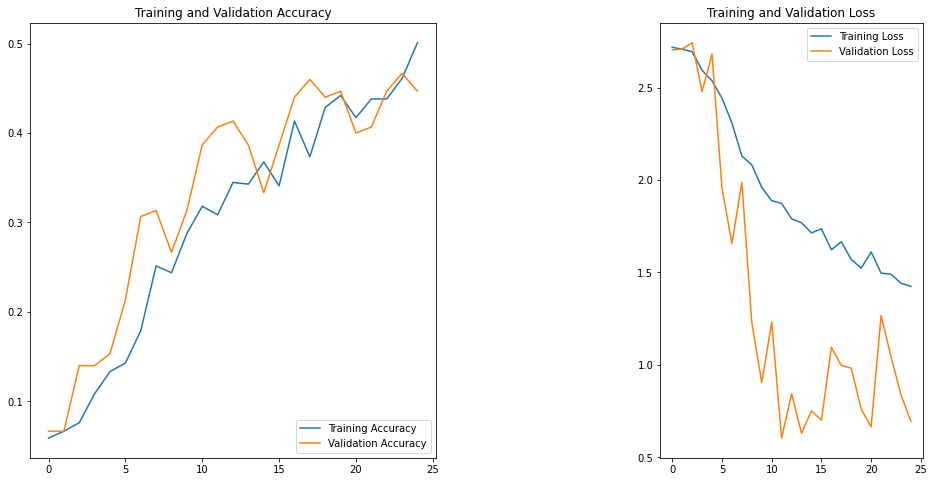

[0.6940851211547852, 0.4466666579246521]

In [0]:
BATCH_SIZE = 32
IMG_SHAPE  = 48 
EPOCHS = 25
plottrain = True


test_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(test_folder,
                                                                        shuffle=True,
                                                                        target_size=(IMG_SHAPE,IMG_SHAPE),
                                                                        batch_size = BATCH_SIZE) 

val_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(val_folder,
                                                                       shuffle=False,
                                                                       #class_mode='binary',
                                                                       target_size=(IMG_SHAPE,IMG_SHAPE),
                                                                       batch_size = BATCH_SIZE)

train_generator = ImageDataGenerator(rescale=1./255,
                                     brightness_range=(.2,1),
                                     shear_range=0.2,
                                     channel_shift_range=128,
                                     rotation_range=45,
                                     vertical_flip=True,
                                     zoom_range=0.5,).flow_from_directory(train_folder,
                                                                          shuffle=True,
                                                                          #class_mode='binary',
                                                                          target_size=(IMG_SHAPE,IMG_SHAPE),
                                                                          batch_size=BATCH_SIZE)

model2 = models.Sequential(name='CNN 1')

model2.add(layers.Conv2D(768, (3,3), activation='relu',input_shape=(IMG_SHAPE ,IMG_SHAPE,  3)))
model2.add(layers.MaxPooling2D((3, 3)))

model2.add(layers.Conv2D(1024, (3,3), activation='relu', padding="same"))
model2.add(layers.MaxPooling2D((3, 3)))
#model2.add(layers.Dropout(0.05)

model2.add(layers.Conv2D(512, (3,3), activation='relu', padding="same"))
model2.add(layers.MaxPooling2D((3, 3)))

model2.add(layers.Conv2D(256, (3,3), activation='relu', padding="same"))
#model2.add(layers.MaxPooling2D((3, 3))) 

model2.add(layers.Flatten())
model2.add(layers.Dense(15, activation='softmax'))

model2.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['acc'])
model2.summary()

history = model2.fit(train_generator,
                    epochs=EPOCHS,
                    #batch_size=32,
                    #validation_split= 0.1,
                    validation_data=val_generator,
                    verbose=1)

results_train1 = model2.evaluate(train_generator)
model2_val_results = model2.evaluate(val_generator)
model2_val_results
#model.predict_classes(val_images)

if plottrain == True:
  acc = history.history['acc']
  val_acc = history.history['val_acc']

  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs_range = range(EPOCHS)

  plt.figure(figsize=(16, 8))
  plt.subplot(1, 2, 1)
  plt.plot(epochs_range, acc, label='Training Accuracy')
  plt.plot(epochs_range, val_acc, label='Validation Accuracy')
  plt.legend(loc='lower right')
  plt.title('Training and Validation Accuracy')

  plt.subplot(1, 3, 3)
  plt.plot(epochs_range, loss, label='Training Loss')
  plt.plot(epochs_range, val_loss, label='Validation Loss')
  plt.legend(loc='upper right')
  plt.title('Training and Validation Loss')
  plt.savefig('./foo.png')
  plt.show()
model2_val_results

In [0]:
model2.predict(test_images[:1])

array([[8.9223413e-08, 9.9975592e-01, 1.5309214e-06, 2.2928591e-04,
        1.3173030e-05, 9.1070079e-10, 2.4662183e-10, 1.4682051e-08]],
      dtype=float32)

In [0]:
model2.predict_classes(test_images[:5])

array([1, 4, 5, 5, 0, 0, 4, 6, 0, 0, 0, 0, 3, 1, 5, 1, 0, 4, 1, 5, 1, 2,
       0, 6, 7, 3, 5, 2, 4, 5, 2, 0, 1, 7, 1, 5, 0, 5, 1, 5, 7, 2, 6, 5,
       7, 6, 6, 3, 6, 2, 3, 6, 6, 7, 7, 2, 2, 7])

In [0]:
test_labels[0]

array([0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

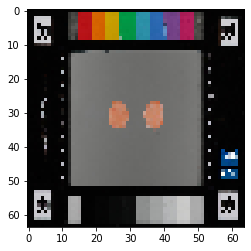

In [0]:
plt.imshow(test_images[:1][0])

## model3 - Acc: 0.58

In [0]:
BATCH_SIZE = 32
IMG_SHAPE  = 32 
EPOCHS = 50
plottrain = True


test_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(test_folder,
                                                                        shuffle=True,
                                                                        target_size=(IMG_SHAPE,IMG_SHAPE),
                                                                        batch_size = BATCH_SIZE) 

val_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(val_folder,
                                                                       shuffle=False,
                                                                       #class_mode='binary',
                                                                       target_size=(IMG_SHAPE,IMG_SHAPE),
                                                                       batch_size = BATCH_SIZE)

train_generator = ImageDataGenerator(rescale=1./255,
                                     brightness_range=(.2,1),
                                     shear_range=0.2,
                                     channel_shift_range=128,
                                     rotation_range=45,
                                     vertical_flip=True,
                                     zoom_range=0.5,).flow_from_directory(train_folder,
                                                                          shuffle=True,
                                                                          #class_mode='binary',
                                                                          target_size=(IMG_SHAPE,IMG_SHAPE),
                                                                          batch_size=BATCH_SIZE)
# model3 = VGG16(weights='imagenet', include_top=False,input_shape=(IMG_SHAPE ,IMG_SHAPE,  3))
# model3.layers.pop()
# model3 = Model(inputs=model3.inputs, outputs=model3.layers[-1].output)

model3 = models.Sequential(name='CNN 4')

model3.add(layers.Conv2D(768, (3,3), activation='relu',input_shape=(IMG_SHAPE ,IMG_SHAPE,  3)))
model3.add(layers.MaxPooling2D((3, 3)))


model3.add(layers.Conv2D(1024, (3,3), activation='relu', padding="same"))
model3.add(layers.MaxPooling2D((3, 3)))
model3.add(layers.Dropout(0.05))

model3.add(layers.Conv2D(512, (3,3), activation='relu', padding="same"))
model3.add(layers.MaxPooling2D((3, 3)))

model3.add(layers.Conv2D(256, (3,3), activation='relu', padding="same"))
#model3.add(layers.MaxPooling2D((3, 3))) 

model3.add(layers.Flatten())
model3.add(layers.Dense(15, activation='softmax'))

# learning

model3.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['acc'])
model3.summary()

checkpoint = ModelCheckpoint("/content/drive/My Drive/RxID/RxID15/Models/RxID15{}".format(model3.name), monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_acc', min_delta=0, patience=20, verbose=1, mode='auto')


history = model3.fit(train_generator,
                    epochs=EPOCHS,
                    #batch_size=32,
                    #validation_split= 0.1,
                    validation_data=val_generator,
                     callbacks=[checkpoint,early],
                    verbose=1)

results_train1 = model3.evaluate(train_generator)
model3_val_results = model3.evaluate(val_generator)
model3_val_results
#model.predict_classes(val_images)

if plottrain == True:
  acc = history.history['acc']
  val_acc = history.history['val_acc']

  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs_range = range(EPOCHS)

  plt.figure(figsize=(16, 8))
  plt.subplot(1, 2, 1)
  plt.plot(epochs_range, acc, label='Training Accuracy')
  plt.plot(epochs_range, val_acc, label='Validation Accuracy')
  plt.legend(loc='lower right')
  plt.title('Training and Validation Accuracy')

  plt.subplot(1, 3, 3)
  plt.plot(epochs_range, loss, label='Training Loss')
  plt.plot(epochs_range, val_loss, label='Validation Loss')
  plt.legend(loc='upper right')
  plt.title('Training and Validation Loss')
  plt.savefig('/content/drive/My Drive/RxID/RxID15/Model Images/{}-Acc_Loss.png'.format(model3.name))
  plt.show()
model3_val_results

Found 74 images belonging to 15 classes.
Found 150 images belonging to 15 classes.
Found 525 images belonging to 15 classes.
Model: "CNN 1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 30, 30, 768)       21504     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 10, 10, 768)       0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 10, 10, 1024)      7078912   
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 3, 3, 1024)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 3, 3, 1024)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 3, 3, 512)         4719104   
__

KeyboardInterrupt: ignored

---

## model4 - Acc: 0.65

- dropout
- 100 epochs

Found 74 images belonging to 15 classes.
Found 150 images belonging to 15 classes.
Found 525 images belonging to 15 classes.
Model: "CNN 4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 30, 30, 768)       21504     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 10, 10, 768)       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 10, 10, 1024)      7078912   
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 3, 3, 1024)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 3, 3, 1024)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 3, 3, 512)         4719104   
__

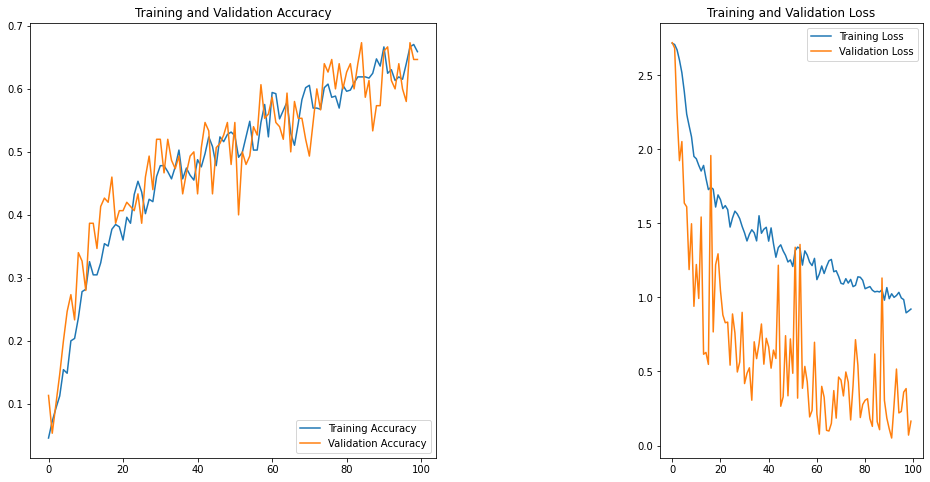

[0.1645990014076233, 0.6466666460037231]

In [0]:
BATCH_SIZE = 32
IMG_SHAPE  = 32 
EPOCHS = 100
plottrain = True


test_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(test_folder,
                                                                        shuffle=True,
                                                                        target_size=(IMG_SHAPE,IMG_SHAPE),
                                                                        batch_size = BATCH_SIZE) 

val_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(val_folder,
                                                                       shuffle=False,
                                                                       #class_mode='binary',
                                                                       target_size=(IMG_SHAPE,IMG_SHAPE),
                                                                       batch_size = BATCH_SIZE)

train_generator = ImageDataGenerator(rescale=1./255,
                                     brightness_range=(.2,1),
                                     shear_range=0.2,
                                     channel_shift_range=128,
                                     rotation_range=45,
                                     vertical_flip=True,
                                     zoom_range=0.5,).flow_from_directory(train_folder,
                                                                          shuffle=True,
                                                                          #class_mode='binary',
                                                                          target_size=(IMG_SHAPE,IMG_SHAPE),
                                                                          batch_size=BATCH_SIZE)
# model4 = VGG16(weights='imagenet', include_top=False,input_shape=(IMG_SHAPE ,IMG_SHAPE,  3))
# model4.layers.pop()
# model4 = Model(inputs=model4.inputs, outputs=model4.layers[-1].output)

model4 = models.Sequential(name='CNN 4')

model4.add(layers.Conv2D(768, (3,3), activation='relu',input_shape=(IMG_SHAPE ,IMG_SHAPE,  3)))
model4.add(layers.MaxPooling2D((3, 3)))


model4.add(layers.Conv2D(1024, (3,3), activation='relu', padding="same"))
model4.add(layers.MaxPooling2D((3, 3)))
model4.add(layers.Dropout(0.05))

model4.add(layers.Conv2D(512, (3,3), activation='relu', padding="same"))
model4.add(layers.MaxPooling2D((3, 3)))

model4.add(layers.Conv2D(256, (3,3), activation='relu', padding="same"))
#model4.add(layers.MaxPooling2D((3, 3))) 

model4.add(layers.Flatten())
model4.add(layers.Dense(15, activation='softmax'))

# learning

model4.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['acc'])
model4.summary()

checkpoint = ModelCheckpoint("/content/drive/My Drive/RxID/RxID15/Models/RxID15{}".format(model4.name), monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_acc', min_delta=0, patience=20, verbose=1, mode='auto')


history = model4.fit(train_generator,
                    epochs=EPOCHS,
                    #batch_size=32,
                    #validation_split= 0.1,
                    validation_data=val_generator,
                     callbacks=[checkpoint,early],
                    verbose=1)

results_train1 = model4.evaluate(train_generator)
model4_val_results = model4.evaluate(val_generator)
model4_val_results
#model.predict_classes(val_images)

if plottrain == True:
  acc = history.history['acc']
  val_acc = history.history['val_acc']

  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs_range = range(EPOCHS)

  plt.figure(figsize=(16, 8))
  plt.subplot(1, 2, 1)
  plt.plot(epochs_range, acc, label='Training Accuracy')
  plt.plot(epochs_range, val_acc, label='Validation Accuracy')
  plt.legend(loc='lower right')
  plt.title('Training and Validation Accuracy')

  plt.subplot(1, 3, 3)
  plt.plot(epochs_range, loss, label='Training Loss')
  plt.plot(epochs_range, val_loss, label='Validation Loss')
  plt.legend(loc='upper right')
  plt.title('Training and Validation Loss')
  plt.savefig('/content/drive/My Drive/RxID/RxID15/Model Images/{}-Acc_Loss.png'.format(model4.name))
  plt.show()
model4_val_results

## model5 - 


- dropout
- 150 epochs

Found 74 images belonging to 15 classes.
Found 150 images belonging to 15 classes.
Found 525 images belonging to 15 classes.
Model: "CNN 4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 768)       21504     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 10, 10, 768)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 1024)      7078912   
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 1024)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 3, 3, 1024)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 512)         4719104   
__

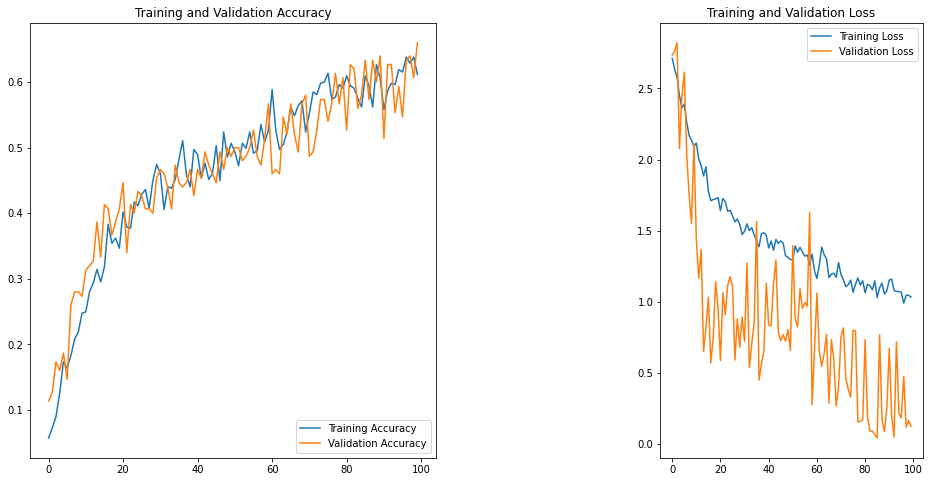

[0.1257256716489792, 0.6600000262260437]

In [9]:
BATCH_SIZE = 32
IMG_SHAPE  = 32 
EPOCHS = 100
plottrain = True


test_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(test_folder,
                                                                        shuffle=True,
                                                                        target_size=(IMG_SHAPE,IMG_SHAPE),
                                                                        batch_size = BATCH_SIZE) 

val_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(val_folder,
                                                                       shuffle=False,
                                                                       #class_mode='binary',
                                                                       target_size=(IMG_SHAPE,IMG_SHAPE),
                                                                       batch_size = BATCH_SIZE)

train_generator = ImageDataGenerator(rescale=1./255,
                                     brightness_range=(.2,1),
                                     shear_range=0.2,
                                     channel_shift_range=128,
                                     rotation_range=45,
                                     vertical_flip=True,
                                     zoom_range=0.5,).flow_from_directory(train_folder,
                                                                          shuffle=True,
                                                                          #class_mode='binary',
                                                                          target_size=(IMG_SHAPE,IMG_SHAPE),
                                                                          batch_size=BATCH_SIZE)
# model5 = VGG16(weights='imagenet', include_top=False,input_shape=(IMG_SHAPE ,IMG_SHAPE,  3))
# model5.layers.pop()
# model5 = Model(inputs=model5.inputs, outputs=model5.layers[-1].output)

model5 = models.Sequential(name='CNN 4')

model5.add(layers.Conv2D(768, (3,3), activation='relu',input_shape=(IMG_SHAPE ,IMG_SHAPE,  3)))
model5.add(layers.MaxPooling2D((3, 3)))


model5.add(layers.Conv2D(1024, (3,3), activation='relu', padding="same"))
model5.add(layers.MaxPooling2D((3, 3)))
model5.add(layers.Dropout(0.05))

model5.add(layers.Conv2D(512, (3,3), activation='relu', padding="same"))
model5.add(layers.MaxPooling2D((3, 3)))

model5.add(layers.Conv2D(256, (3,3), activation='relu', padding="same"))
#model5.add(layers.MaxPooling2D((3, 3))) 

model5.add(layers.Flatten())
model5.add(layers.Dense(15, activation='softmax'))

# learning

model5.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['acc'])
model5.summary()

checkpoint = ModelCheckpoint("/content/drive/My Drive/RxID/RxID15/Models/RxID15{}".format(model5.name), monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_acc', min_delta=0, patience=20, verbose=1, mode='auto')


history = model5.fit(train_generator,
                    epochs=EPOCHS,
                    #batch_size=32,
                    #validation_split= 0.1,
                    validation_data=val_generator,
                     callbacks=[checkpoint,early],
                    verbose=1)

results_train1 = model5.evaluate(train_generator)
model5_val_results = model5.evaluate(val_generator)
model5_val_results
#model.predict_classes(val_images)

if plottrain == True:
  acc = history.history['acc']
  val_acc = history.history['val_acc']

  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs_range = range(EPOCHS)

  plt.figure(figsize=(16, 8))
  plt.subplot(1, 2, 1)
  plt.plot(epochs_range, acc, label='Training Accuracy')
  plt.plot(epochs_range, val_acc, label='Validation Accuracy')
  plt.legend(loc='lower right')
  plt.title('Training and Validation Accuracy')

  plt.subplot(1, 3, 3)
  plt.plot(epochs_range, loss, label='Training Loss')
  plt.plot(epochs_range, val_loss, label='Validation Loss')
  plt.legend(loc='upper right')
  plt.title('Training and Validation Loss')
  plt.savefig('/content/drive/My Drive/RxID/RxID15/Model Images/{}-Acc_Loss.png'.format(model5.name))
  plt.show()
model5_val_results

## model6 - 

In [0]:
test_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(test_folder,
                                                                        shuffle=True,
                                                                        target_size=(IMG_SHAPE,IMG_SHAPE))

Found 74 images belonging to 15 classes.


Found 74 images belonging to 15 classes.
Found 150 images belonging to 15 classes.
Found 525 images belonging to 15 classes.
Model: "CNN 4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 34, 34, 768)       21504     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 768)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 1024)      7078912   
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 1024)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 3, 3, 1024)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 512)         4719104   
__

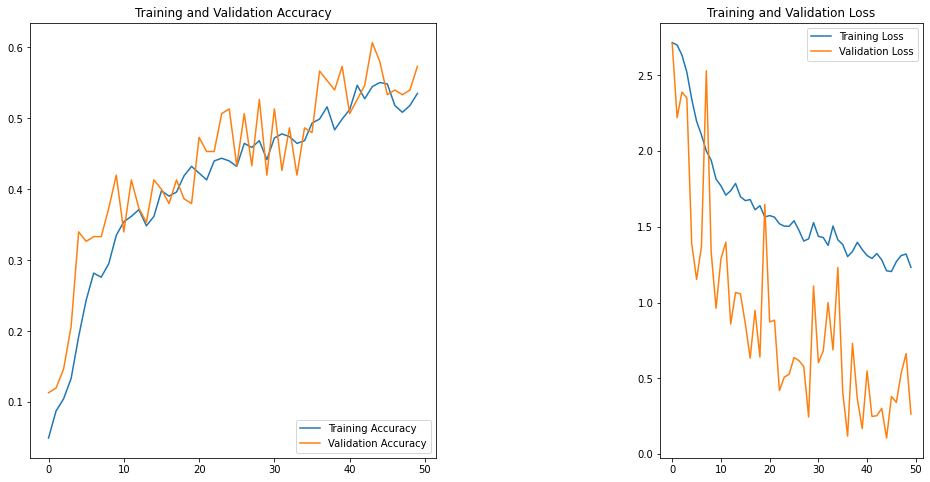

[0.26507696509361267, 0.5733333230018616]

In [0]:
BATCH_SIZE = 32
IMG_SHAPE  = 36 
EPOCHS = 100
plottrain = True


test_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(test_folder,
                                                                        shuffle=True,
                                                                        target_size=(IMG_SHAPE,IMG_SHAPE),
                                                                        #batch_size = BATCH_SIZE) 

val_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(val_folder,
                                                                       shuffle=False,
                                                                       #class_mode='binary',
                                                                       target_size=(IMG_SHAPE,IMG_SHAPE),
                                                                       batch_size = BATCH_SIZE)

train_generator = ImageDataGenerator(rescale=1./255,
                                     brightness_range=(.2,1),
                                     shear_range=0.2,
                                     channel_shift_range=128,
                                     rotation_range=45,
                                     vertical_flip=True,
                                     zoom_range=0.5,).flow_from_directory(train_folder,
                                                                          shuffle=True,
                                                                          #class_mode='binary',
                                                                          target_size=(IMG_SHAPE,IMG_SHAPE),
                                                                          batch_size=BATCH_SIZE)
# model6 = VGG16(weights='imagenet', include_top=False,input_shape=(IMG_SHAPE ,IMG_SHAPE,  3))
# model6.layers.pop()
# model6 = Model(inputs=model6.inputs, outputs=model6.layers[-1].output)

model6 = models.Sequential(name='model6')

model6.add(layers.Conv2D(768, (3,3), activation='relu',input_shape=(IMG_SHAPE ,IMG_SHAPE,  3)))
model6.add(layers.MaxPooling2D((3, 3)))

model6.add(layers.Conv2D(1024, (3,3), activation='relu', padding="same"))
model6.add(layers.MaxPooling2D((3, 3)))
model6.add(layers.Dropout(0.05))

model6.add(layers.Conv2D(512, (3,3), activation='relu', padding="same"))
model6.add(layers.MaxPooling2D((3, 3)))

model6.add(layers.Conv2D(256, (3,3), activation='relu', padding="same"))
#model6.add(layers.MaxPooling2D((3, 3))) 

model6.add(layers.Flatten())
model6.add(layers.Dense(15, activation='softmax'))

model6.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['acc'])
model6.summary()

checkpoint = ModelCheckpoint("{}-{}".format(model6.name), monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_acc', min_delta=0, patience=20, verbose=1, mode='auto')


history = model6.fit(train_generator,
                    epochs=EPOCHS,
                    #batch_size=32,
                    #validation_split= 0.1,
                    validation_data=val_generator,
                     callbacks=[checkpoint,early],
                    verbose=1)

results_train1 = model6.evaluate(train_generator)
model6_val_results = model6.evaluate(val_generator)
model6_val_results
#model.predict_classes(val_images)

if plottrain == True:
  acc = history.history['acc']
  val_acc = history.history['val_acc']

  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs_range = range(EPOCHS)

  plt.figure(figsize=(16, 8))
  plt.subplot(1, 2, 1)
  plt.plot(epochs_range, acc, label='Training Accuracy')
  plt.plot(epochs_range, val_acc, label='Validation Accuracy')
  plt.legend(loc='lower right')
  plt.title('Training and Validation Accuracy')

  plt.subplot(1, 3, 3)
  plt.plot(epochs_range, loss, label='Training Loss')
  plt.plot(epochs_range, val_loss, label='Validation Loss')
  plt.legend(loc='upper right')
  plt.title('Training and Validation Loss')
  #plt.savefig('./foo.png')
  plt.show()
model6_val_results

In [0]:
model4.predict_generator(test_generator,10)[:5]

array([[1.5603587e-01, 1.3551349e-04, 9.0713213e-05, 8.9450151e-02,
        3.3724788e-04, 1.9175600e-01, 9.2876321e-03, 3.6157876e-01,
        1.1475331e-04, 7.0058599e-02, 9.2301272e-02, 5.1353173e-04,
        2.7433937e-02, 3.9138136e-05, 8.6686132e-04],
       [1.2499259e-09, 3.4617544e-05, 5.2671645e-09, 4.4543671e-05,
        4.2752055e-07, 7.1680397e-01, 2.1699364e-01, 4.9954217e-08,
        6.4434238e-02, 1.9503043e-04, 2.0082622e-10, 1.2558334e-03,
        8.7603396e-05, 1.3863835e-10, 1.4999064e-04],
       [1.0535298e-11, 9.8759544e-19, 8.3027976e-17, 5.8028089e-11,
        8.6178517e-01, 5.6092631e-12, 1.1231292e-11, 2.2120450e-12,
        1.7435057e-15, 1.3620343e-09, 1.5526190e-10, 7.7676678e-11,
        1.3388103e-08, 1.2064401e-09, 1.3821489e-01],
       [1.1483950e-06, 5.3155227e-11, 4.7285376e-10, 1.6375064e-09,
        4.0813600e-05, 4.1771662e-09, 6.3269066e-09, 1.9558092e-07,
        3.3644291e-08, 2.8014643e-10, 3.6251902e-05, 2.3909703e-09,
        1.6596490e-05,

In [0]:
model4.

In [0]:
model4.predict_classes(test_generator)

ValueError: ignored

In [0]:
test_labels[0]

array([0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

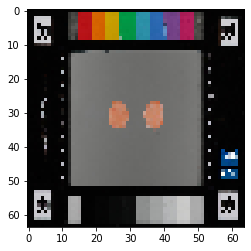

In [0]:
plt.imshow(test_images[:1][0])

In [0]:
tf.keras.applications.VGG19(
    include_top=True,
    weights="imagenet",
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000,
    classifier_activation="softmax",
)

In [0]:
tf.math.confusion_matrix(
    val_labels[:5][1], 
    model2.predict_classes(test_images[:5]), 
    num_classes=8, weights=None, dtype=tf.dtypes.int32,
    #name=None
)

InvalidArgumentError: ignored

## model5

In [0]:
model3 = models.Sequential(name='CNN 3HL(1024/512/256/512)-5Ep-TL=False')

model3.add(layers.Conv2D(2048, (3, 3), activation='relu',input_shape=(256 ,256,  3)))
model3.add(layers.MaxPooling2D((2,2)))

model3.add(layers.Conv2D(1024, (3, 3), activation='relu', padding="same"))
model3.add(layers.MaxPooling2D((2,2)))

model3.add(layers.Conv2D(512, (3, 3), activation='relu', padding="same"))
model3.add(layers.MaxPooling2D((2, 2)))

model3.add(layers.Conv2D(512, (3, 3), activation='relu', padding="same"))
model3.add(layers.MaxPooling2D((2, 2))) 

model3.add(layers.Conv2D(256, (3, 3), activation='relu', padding="same"))
model3.add(layers.MaxPooling2D((2, 2))) 


model3.add(layers.Flatten())
model3.add(layers.Dense(11, activation='softmax'))

model3.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['acc'])
model3.summary()

history = model3.fit(train_images,
                    train_labels,
                    epochs=5,
                    batch_size=32,
                    validation_split= 0.1,
                    #validation_data=(val_images, val_y)
                    verbose=1)

results_train = model3.evaluate(train_images, train_labels)
model3_val_results = model3.evaluate(val_images, val_labels)

results_train

model3_val_results

#model.predict_classes(val_images)

## model6

In [0]:
model4 = models.Sequential(name='CNN 3HL(1024/512/256/512)-5Ep-TL=False')

model4.add(layers.Conv2D(1024, (3, 3), activation='relu',input_shape=(64 ,64,  3)))
model4.add(layers.MaxPooling2D((2,2)))

model4.add(layers.Conv2D(2048, (3, 3), activation='relu', padding="same"))
model4.add(layers.MaxPooling2D((2,2)))

model4.add(layers.Conv2D(256, (3, 3), activation='relu', padding="same"))
model4.add(layers.MaxPooling2D((2, 2)))

model4.add(layers.Conv2D(512, (3, 3), activation='relu', padding="same"))
model4.add(layers.MaxPooling2D((2, 2))) 


model4.add(layers.Flatten())
model4.add(layers.Dense(11, activation='softmax'))

model4.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['acc'])
model4.summary()

history = model4.fit(train_images,
                    train_labels,
                    epochs=5,
                    batch_size=32,
                    validation_split= 0.1,
                    #validation_data=(val_images, val_y)
                    verbose=1)

results_train4 = model4.evaluate(train_images, train_labels)
results_test4 = model4.evaluate(val_images, val_labels)

results_train

results_test

#model.predict_classes(val_images)

Model: "CNN 3HL(1024/512/256/512)-5Ep-TL=False"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 62, 62, 1024)      28672     
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 31, 31, 1024)      0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 31, 31, 2048)      18876416  
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 15, 15, 2048)      0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 15, 15, 256)       4718848   
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 7, 7, 256)         0         
_________________________________________________________________
conv2d_28 (Conv2D)          

---